
# Project: Exploratory Analysis on TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'> </a>
## Introduction

- The tmdb-movies dataset contains information about 10866 movies collected from The Movie Database(TMDb) with 21 columns attributes. 

- From 1966 to 2015, there are over 10, 000 movies recorded in this dataset. The cast, budget, revenue, director, homepage, genres etc. all the production information along with the market feedback information like vote_count, vote_average, popularity. There are a lot of information included, but also some problems with the recording of the data.Some records are duplicated, some values are missing, some columns are in a improper format and will be hard to recognize or harder to do further analysis. So, in order to make the dataset more convenient to explore or simply make it looks clean, I will modify the dataset to fix some issue as mentioned and explore the data a little bit, as well as present some visualizations. 
 
There are some questions may come up when we start talking about movies. I like to re-watch some good old movies, some people interested in recent and most popular movies. 
<ul>
<li><a href="#q1"> Q1: What are the 30 most popular movies in the recent year, and what are the 30 most popular movies? </a></li>

<li><a href="#q2"> Q2: Which genres are there most productions over the years? </a></li>

<li><a href="#q3"> Q3: What are the popularity and other features for the movies that have negative revenue? </a></li>

<li><a href="#q4"> Q4: What kinds of properties are associated with movies that have high revenue? </a></li>
</ul>
Let's explore the data with those questions and the libraries will be used are numpy, pandas and matplotlib. 


In [1]:
# import the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Load in the data, check for cleanliness, and then trim and clean dataset for analysis. 

### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.duplicated().sum()

1

In [5]:
df[df.id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


We can see that these two records are exactly the same, no need to keep both. 

In [6]:
df[df.id==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Create a subset of the original dataset. There are a lot of string columns that we are not interested in exploring this time. 
So, we just select the columns that may be helpful in the analysis later 

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
df_clean=df[['id', 'popularity', 'original_title',
       'director',  
       'runtime', 'genres',  'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']]

In [9]:
df_clean.head(3)

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


In [11]:
df_clean.describe(include='all')

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866,10822,10866.000000,10843,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,NaN,10571,5067,NaN,2039,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hamlet,Woody Allen,NaN,Comedy,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,45,NaN,712,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,0.646441,NaN,NaN,102.070863,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,NaN,NaN,31.381405,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,NaN,NaN,0.000000,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,NaN,NaN,90.000000,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,NaN,NaN,99.000000,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,NaN,NaN,111.000000,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


### Data issue identify and the plan of cleaning 

- for the duplicated record, drop the duplicates. 
- the columns contain scientific notation, change the budget and revenue format to in million unit
- change the release_date column to datetime type, id to string,  and correct the errors when converting, 
  eg. 1966 is written as 2066, seems 19xx are miswritten as 20xx  
- the genres combinations makes harder to aggregate genres, split the genres column, make individual row of each genre 

In [12]:
#code of drop the duplicated row
df_clean=df_clean.drop(df_clean.index[2090])
#test the result 
df_clean.id.duplicated().sum()

0

In [13]:
#convert the scientific notation in million and round to 2 decimals, it will reduce some accuracy for the record, 
#but let's assume that people don't care the small numbers when talking about making movies
df_clean[['budget_adj', 'revenue_adj']]=(df_clean[['budget_adj', 'revenue_adj']]/1000000).round(2)

In [14]:
#code change release_date column type
df_clean['release_date']=pd.to_datetime(df_clean['release_date'],format='%m/%d/%y')
df_clean.id=df_clean.id.astype(str)
#test the result 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [15]:
df_clean.tail(3)

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,2066-01-01,11,6.5,1966,0.00,0.0
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,2066-11-02,22,5.4,1966,0.00,0.0
10865,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren,74,Horror,2066-11-15,15,1.5,1966,0.13,0.0


When converting the release_date into dateframe using pandas, it seems some issue happened that, some 1900s and 2000s are messed up, and we need fix this

In [16]:
df_clean.query('release_date > "2015-12-31"')['release_date'].dt.year.value_counts().index

Int64Index([2066, 2064, 2067, 2068, 2065, 2063, 2062, 2060, 2061], dtype='int64')

In [17]:
temp=df_clean.query('release_date > "2015-12-31"')
print('the data with wrong year converted:',temp.shape)
print('\n')
temp.groupby('release_year').size()

the data with wrong year converted: (331, 12)




release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
dtype: int64

In [18]:
temp['release_date'] = temp['release_date'].apply(lambda x: x.replace(year=x.year - 100))
temp.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,62,3.309196,2001: A Space Odyssey,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,1968-04-05,1708,7.7,1968,75.23,355.55
9720,871,1.152937,Planet of the Apes,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,1968-02-07,469,7.2,1968,36.36,209.35
9721,10331,1.058272,Night of the Living Dead,George A. Romero,96,Horror,1968-10-01,279,7.2,1968,0.71,0.00
9722,26690,0.891163,The Boston Strangler,Richard Fleischer,116,Crime|Drama|Mystery|Thriller,1968-10-08,15,6.6,1968,0.00,0.00
9723,8069,0.867192,Barbarella,Roger Vadim,98,Science Fiction,1968-10-10,63,5.4,1968,0.00,0.00


In [19]:
drop_index_list=df_clean.query('release_date > "2015-12-31"').index
drop_index_list

Int64Index([ 9719,  9720,  9721,  9722,  9723,  9724,  9725,  9726,  9727,
             9728,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=331)

In [20]:
df_clean.drop(drop_index_list, axis=0, inplace=True)
df_clean.query('release_date > "2015-12-31"')

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [21]:
df_clean=df_clean.append(temp,ignore_index = True, sort = False)
df_clean.shape

(10865, 12)

In [22]:
df_clean.release_date.tail()

10860   1966-06-15
10861   1966-12-21
10862   1966-01-01
10863   1966-11-02
10864   1966-11-15
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'> </a>
#### Let's check out the 30 most popular movies in the database and in the recent 3 years. 

In [23]:
df_clean['profit']=df_clean['revenue_adj']-df_clean['budget_adj']

In [24]:
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,102.071790,217.399632,5.975012,2001.321859,17.549921,51.368990,33.819069
std,1.000231,31.382701,575.644627,0.935138,12.813260,34.307520,144.638285,125.219300
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000,-413.910000
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000,0.000000
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000,0.000000
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,20.850000,33.700000,12.930000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,425.000000,2827.120000,2750.130000


### A quick look of the relationships and distributions between variables
The scatter and histogram plot below can give us a general view of the relationship between each numerical variables, and the distribution of the each variable by itself. 

The diagonal histogram charts show the univariate distribution of the variables. 
popularity, runtime, vote_count, revenue_adj have the most of the values on the lower value side, vote_average is normally distributed, release year is skewed to the left, looks like the quantity of movies increased a lot over the years, budget_adj, revenue_adj and profit are skewed to the right, means a few of the movies have big invest amount and a few of them have big revenue.Most of the movies make a certain profit, a few make negative profit, and a few make bigger profit than average. 

The scatter plots show the relationship of two different numeric variables. The popularity and vote_counts, revenue_adj and profit show strong positive linear relationship, so, the more vote the more popular, the more revenue the more profit.

Text(0.5, 1.0, 'The Scatter-Matrix of Numeric Variables')

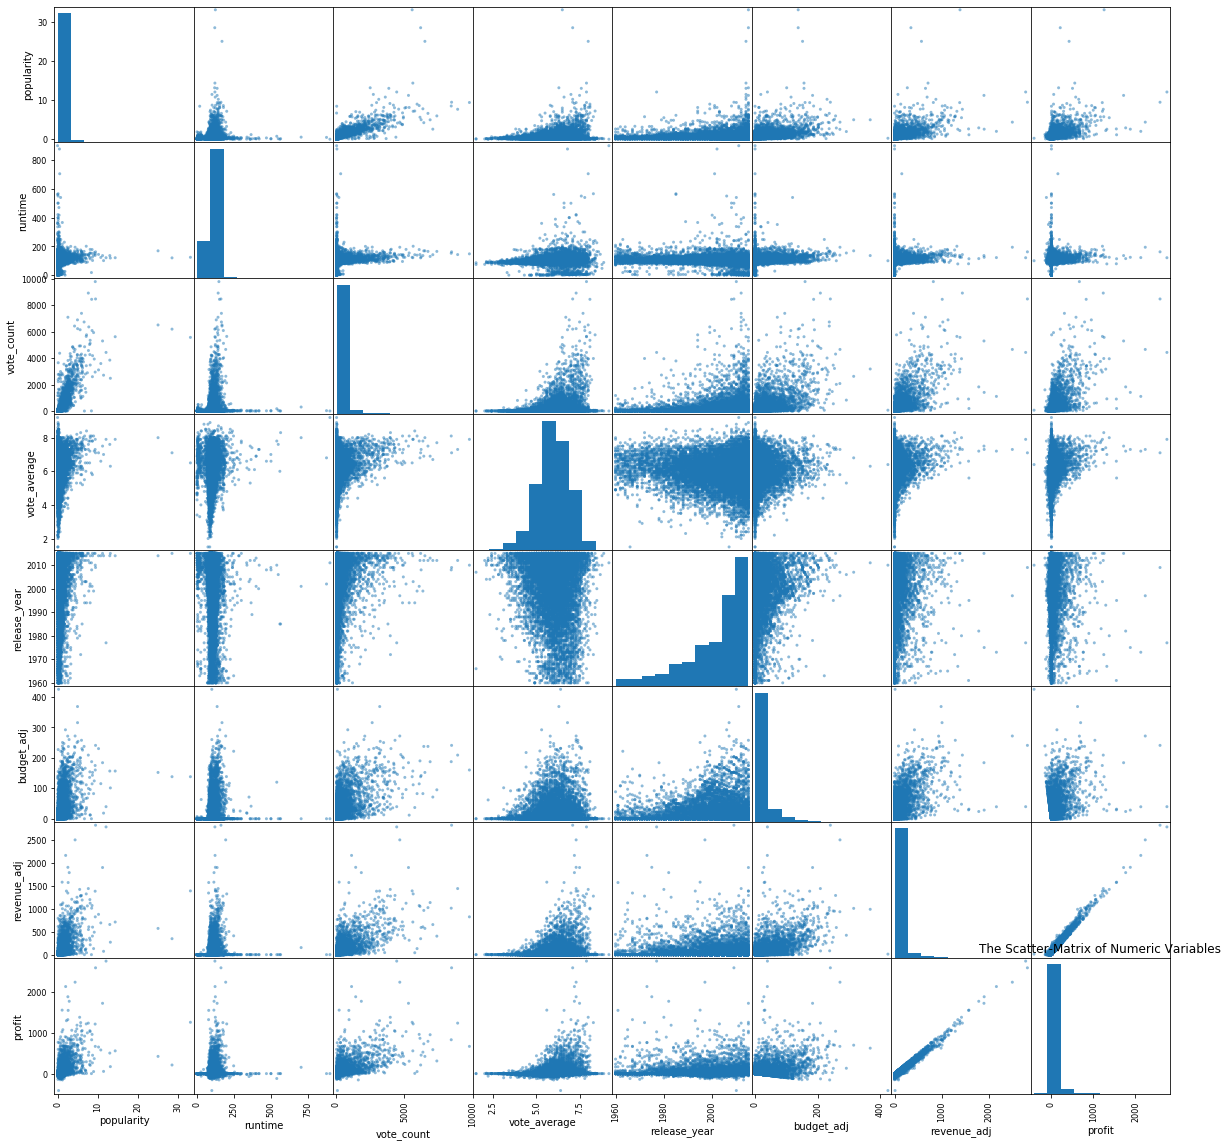

In [26]:
pd.plotting.scatter_matrix(df_clean, figsize=(20, 20));

From the charts below we can see that the most recent popular movies made the records in the history. Only a few of the good-but-old movies made in the top 30 of record. 

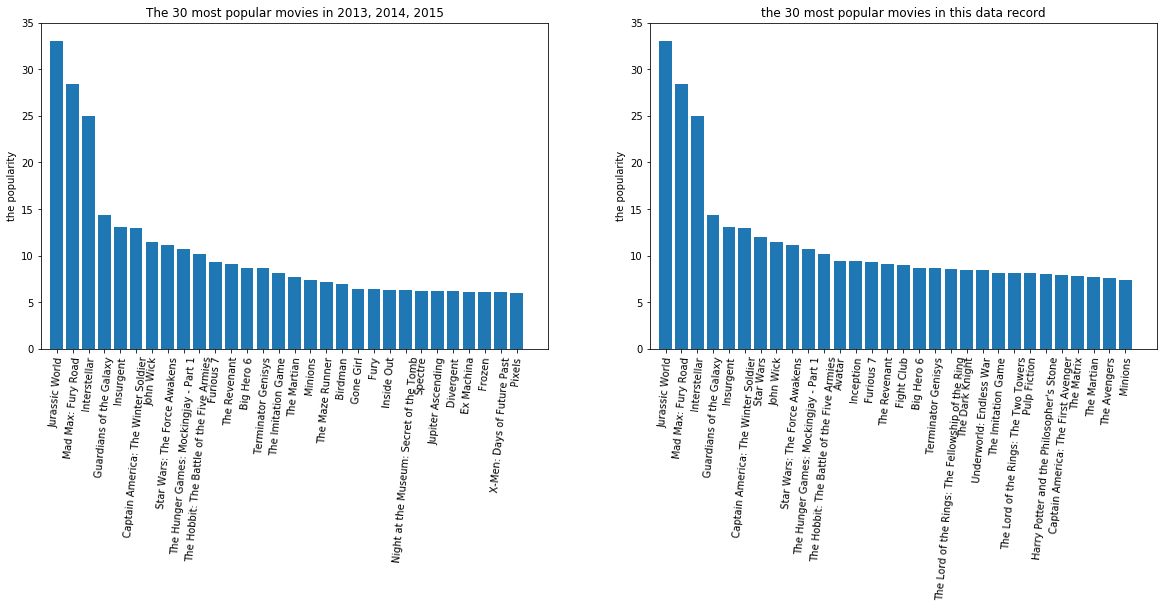

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(121)
top_pop_recent_year=df_clean.query('release_year in (2015, 2014, 2013)')[['original_title','popularity']].sort_values(by='popularity', ascending=False).head(30)
label1=top_pop_recent_year.original_title
plt.bar(np.arange(1,31, 1), top_pop_recent_year.popularity, tick_label=label1)
plt.axis([0, 32, 0, 35])
plt.xticks(rotation=85)
plt.title('The 30 most popular movies in 2013, 2014, 2015')
plt.ylabel('the popularity')

plt.subplot(122)
top_pop=df_clean[['original_title', 'popularity']].sort_values('popularity', ascending=False).head(30)
label2=top_pop.original_title
plt.bar(np.arange(1,31, 1),top_pop.popularity, tick_label=label2)
plt.axis([0, 32, 0, 35])
plt.xticks(rotation=85)
plt.ylabel('the popularity')
plt.title('the 30 most popular movies in this data record')
plt.show()

<a id='q2'> </a>
#### Which genres are there the most productions over the years?

In [28]:
#we want to have each individual genre has a row, so we need split the genres row
# make a subset to hold the splitted columns
genres_split=df_clean[['original_title','release_year', 'genres']]
genres=df_clean.genres.str.split('|', expand=True)

In [29]:
genres_split=genres_split.join(genres)
genres_split.sample(10)

,original_title,release_year,genres,0,1,2,3,4
4857,Hungry For Change,2012,Documentary,Documentary,None,None,None,None
6148,Gotcha!,1985,Action|Comedy|Thriller,Action,Comedy,Thriller,None,None
8858,The Little Mermaid II: Return to the Sea,2000,Animation,Animation,None,None,None,None
6036,Computer Chess,2013,Comedy,Comedy,None,None,None,None
4891,Student of the Year,2012,Comedy|Drama|Music,Comedy,Drama,Music,None,None
607,The Outskirts,2015,Comedy,Comedy,None,None,None,None
3834,George Harrison: Living in the Material World,2011,Music|Documentary,Music,Documentary,None,None,None
9915,The Hot Spot,1990,Drama|Thriller|Crime|Romance,Drama,Thriller,Crime,Romance,None
2795,Ticker,2001,Action|Adventure|Crime|Thriller,Action,Adventure,Crime,Thriller,None
9482,Working Girl,1988,Comedy|Drama|Romance,Comedy,Drama,Romance,None,None


In [30]:
#we need to fill the none cells in order to make a column with combination of 5 types of genres
genres_split.dropna(subset=['genres'], axis=0, inplace=True)
genres_split.fillna('listed_none', inplace=True)
genres_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10864
Data columns (total 8 columns):
original_title    10842 non-null object
release_year      10842 non-null int64
genres            10842 non-null object
0                 10842 non-null object
1                 10842 non-null object
2                 10842 non-null object
3                 10842 non-null object
4                 10842 non-null object
dtypes: int64(1), object(7)
memory usage: 762.3+ KB


In [31]:
genres_split['new_genres']=genres_split[0]+'|'+genres_split[1]+'|'+genres_split[2]+'|'+genres_split[3]+'|'+genres_split[4]
genres_split.sample(10)

,original_title,release_year,genres,0,1,2,3,4,new_genres
873,Hello Ladies: The Movie,2014,Comedy,Comedy,listed_none,listed_none,listed_none,listed_none,Comedy|listed_none|listed_none|listed_none|lis...
4703,Struck by Lightning,2012,Comedy|Drama,Comedy,Drama,listed_none,listed_none,listed_none,Comedy|Drama|listed_none|listed_none|listed_none
1938,Robin Hood,2010,Action,Action,listed_none,listed_none,listed_none,listed_none,Action|listed_none|listed_none|listed_none|lis...
1931,Salt,2010,Action|Thriller|Crime|Mystery,Action,Thriller,Crime,Mystery,listed_none,Action|Thriller|Crime|Mystery|listed_none
8268,Fortress,1992,Action|Thriller|Science Fiction,Action,Thriller,Science Fiction,listed_none,listed_none,Action|Thriller|Science Fiction|listed_none|li...
9822,Monty Python's And Now for Something Completel...,1971,Comedy,Comedy,listed_none,listed_none,listed_none,listed_none,Comedy|listed_none|listed_none|listed_none|lis...
3362,Dante 01,2008,Science Fiction,Science Fiction,listed_none,listed_none,listed_none,listed_none,Science Fiction|listed_none|listed_none|listed...
4372,21 Jump Street,2012,Action|Comedy|Crime,Action,Comedy,Crime,listed_none,listed_none,Action|Comedy|Crime|listed_none|listed_none
10448,Paint Your Wagon,1969,Drama|Action|Comedy|Western|Music,Drama,Action,Comedy,Western,Music,Drama|Action|Comedy|Western|Music
3306,Feast II: Sloppy Seconds,2008,Action|Comedy|Horror,Action,Comedy,Horror,listed_none,listed_none,Action|Comedy|Horror|listed_none|listed_none


In [32]:
df1 = genres_split.copy()
df2 = genres_split.copy() 
df3 = genres_split.copy()
df4 = genres_split.copy()
df5 = genres_split.copy()
# Each one should look like this
# columns to split by "/"
split_columns = ['new_genres']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])
    df2[c] = df2[c].apply(lambda x: x.split("|")[1])
    df3[c] = df3[c].apply(lambda x: x.split("|")[2])
    df4[c] = df4[c].apply(lambda x: x.split("|")[3])
    df5[c] = df5[c].apply(lambda x: x.split("|")[4])

In [33]:
df1.shape,df2.shape,df3.shape,df4.shape, df5.shape

((10842, 9), (10842, 9), (10842, 9), (10842, 9), (10842, 9))

In [34]:
datas=[df2,df3, df4, df5]
genres_list=df1.append(datas)
genres_list.replace('listed_none', np.nan, inplace=True)
genres_list.dropna(subset=['new_genres'], axis=0, inplace=True)

In [35]:
genres_list.drop(['genres', 0, 1, 2, 3, 4], axis=1, inplace=True)
genres_list.head()

,original_title,release_year,new_genres
0,Jurassic World,2015,Action
1,Mad Max: Fury Road,2015,Action
2,Insurgent,2015,Adventure
3,Star Wars: The Force Awakens,2015,Action
4,Furious 7,2015,Action


From the chart below, we can see that the whole movie dataset varies from 20 genres, and in those 20 genres, drama, comedy, thriller, action, romance are the most frequently used genres. Maybe they are easier to catch audiences' attention, maybe those genres can give people more entertainment. 

Text(0.5, 1.0, 'The Frequency of Each Genre Used in All the Movies ')

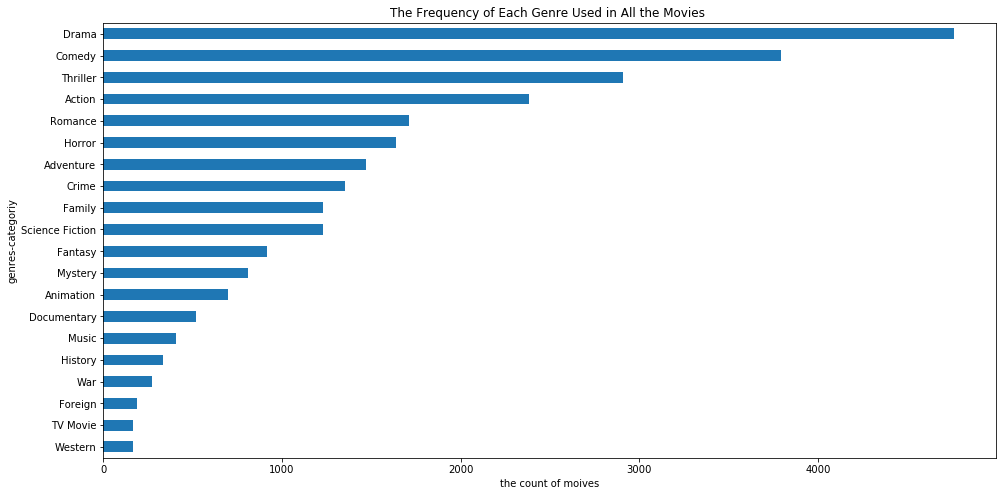

In [37]:
genres_list_plot=genres_list.groupby('new_genres').size().reset_index().sort_values(0, ascending=True)
genres_list_plot_index=genres_list_plot.new_genres
genres_list_plot.plot(kind='barh', figsize=(16,8), legend=None);
plt.yticks(np.arange(0,20, 1), genres_list_plot_index);
plt.xlabel('the count of moives')
plt.ylabel('genres-categoriy')
plt.title('The Frequency of Each Genre Used in All the Movies ')

<a id='q3'> </a>
#### what are the popularity and other features of the movies that have negative revenues?
I am very curious about those movies that make negative profit. What kind of features do they have? We may guess that because those movies are just not good, so not that many people want to watch them. They don't make money, so the profit is negative. Sounds reasonable, let's take a look! 

let's make a mask of the non-profit movies. 

In [38]:
mask_nonprofit=df_clean.profit <0

Around 22% percent of the movies did not make profit according to the data in record.

In [39]:
df_clean[mask_nonprofit].shape[0]/df_clean.shape[0]

0.21564657156005523

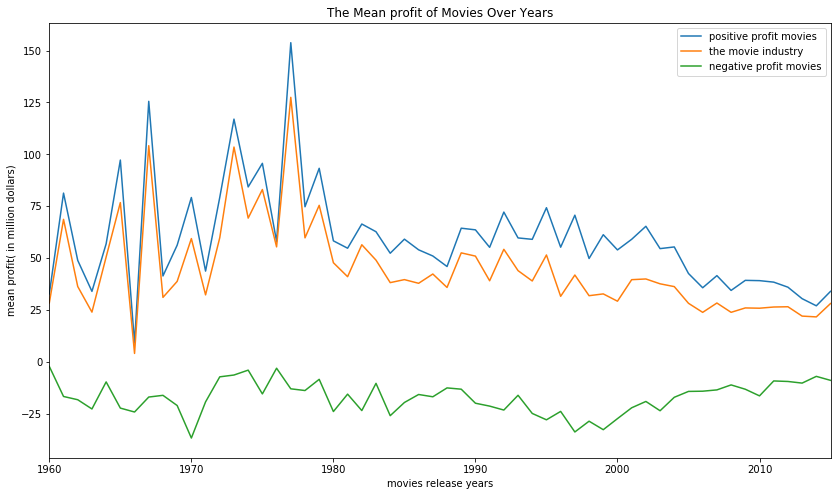

In [40]:
plt.figure(figsize=(14, 8))
df_profit=df_clean.groupby('release_year')['profit'].mean()
df_posi_profit=df_clean[~mask_nonprofit].groupby('release_year')['profit'].mean()
df_neg_profit=df_clean[mask_nonprofit].groupby('release_year')['profit'].mean()
df_posi_profit.plot(kind='line', x='release_year', label='profit')
df_profit.plot(kind='line', x='release_year', label='movie industry')
df_neg_profit.plot(kind='line', x='release_year', label='nonprofit')
plt.xlabel('movies release years')
plt.ylabel('mean profit( in million dollars)')
plt.title('The Mean profit of Movies Over Years')
plt.legend(['positive profit movies', 'the movie industry', 'negative profit movies'])
plt.show()

The mean profit of the movie industry has a lot of ups and downs over the years. From 1980s to 2010, the mean profit of movies decreased a lot over the years, but starting from 2014, 2015, the industry is getting better from the above line chart. 

The movies that have a negative profit do have low popularity score from the below chart.For the positive_profit movies have a much bigger number, so we can limit the y_axis to compare more details

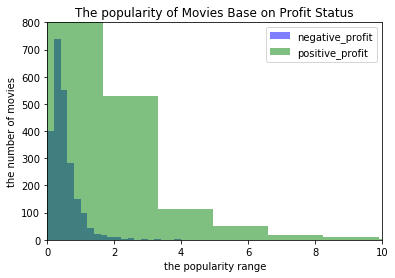

In [41]:
df_clean.popularity[mask_nonprofit].plot(kind='hist', alpha=0.5, bins=20, color='blue', label='negative_profit');
df_clean.popularity[~mask_nonprofit].plot(kind='hist',alpha=0.5, bins=20, color='green', label='positive_profit');
plt.axis([0,10,0,800])
plt.xlabel('the popularity range')
plt.ylabel('the number of movies')
plt.title('The Popularity of Movies Base on Profit Status')
plt.legend();

In [67]:
df_clean.popularity[mask_nonprofit].mean(), df_clean.popularity[~mask_nonprofit].mean()

(0.5088932688860435, 0.6842635560901197)

Although the mean popularity of these two type of movies don't have a very big difference, for the highly skewness to the right, from this chart
we can see that there is big difference about the popularity between those two type of movies. So, low popularity is a feature for 
the negative profit movies.

<a id='q4'> </a>
#### What kinds of properties are associated with movies that have high revenues?  

From the chart below, we can see that there is big difference on the number of vote for the movies that is profit or nonprofit.
The number of vote doesn't mean the votes are all positive, but it can reflect the popularity, it tells that how many people are pay attention on the movies. 

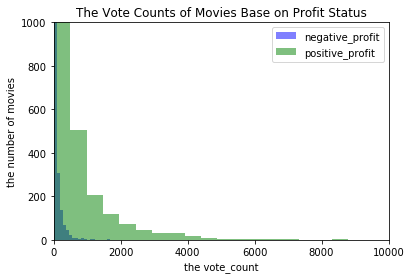

In [42]:
df_clean.vote_count[mask_nonprofit].plot(kind='hist', alpha=0.5, bins=20, color='blue', label='negative_profit');
df_clean.vote_count[~mask_nonprofit].plot(kind='hist',alpha=0.5, bins=20, color='green', label='positive_profit');
plt.axis([0,10000,0,1000])
plt.xlabel('the vote_count')
plt.ylabel('the number of movies')
plt.title('The Vote Counts of Movies Base on Profit Status')
plt.legend();

The average vote chart of the movies tells something different. Not all the movies that doesn't make profit means they are just not good,some of them get good average vote. Maybe some movies don't focus on making money, they are trying to alarm people, remind people or tell some truth instead. 

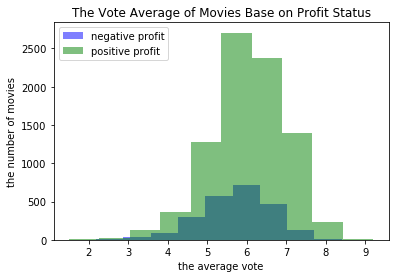

In [44]:
df_clean.vote_average[mask_nonprofit].plot(kind='hist', alpha=0.5, color='blue', label='negative profit')
df_clean.vote_average[~mask_nonprofit].plot(kind='hist', alpha=0.5, color='green', label='positive profit')
plt.xlabel('the average vote')
plt.ylabel('the number of movies');
plt.title('The Vote Average of Movies Base on Profit Status')
plt.legend();

<a id='conclusions'></a>
## Conclusions
Movies is a very common topic in our life, we might hear or have answers in our heart for some questions already, but it is fun to check out the answers with seeing the numbers and with visualizations. 

Not all the movies make profit. According to this dataset, there are around 21.56% of movies that does not make profit. 
The top popular movies for the recent years and in the history are those movies that most we have watched or pretty familiar with, with very high popularity, vote-count, vote_average and they make pretty good profit. On the other hand, some movies that we are not familiar with or never heard about, they have low popularity, low vote_count, low vote_average and make negative profit. 

The genres are very import to the movies. Some genres are much more popular to the movie makers. Like Drama, Comedy, Thriller, action, Romance are much more popular than western, TV Movies, Foreign, War and compare with domestic movies, foreign movies are not popular either. 

<p>The dataset offers a lot of information, and can answer most of the question based on the data, but it also has some limitations.</p>

- the major problem is data incompleteness. There 5758 records have zero budget and 6086 records have zero revenue from 1961 to 2015. We may lose records from old times, but we just don't have records for a lot of movies.If we want to analyze profit, it is like half of the data is ambiguous.  

- information insufficient. The maximum of the vote count is 9767 for the movie "Inception" released in 2010, and the highest average vote is 9.2 for movie "The Story of Film: An Odyssey" in 2010 but only 14 votes. It looks like the data collected is relatively small. 

<p>It looks like the data is limited by collecting, maybe we need more explanation about how the data is collected and which aspects the data represents. So, it makes hard to interpret the accuracy of the analysis. We assume that the data reflect the features in the USA only, but most of the movies are globally available, so if we can have more information from overseas, the analysis and comparisons will be more reliable</p>